# Оценка качества обучения нейронной сети в Keras

На примере распознаванию рукописных цифр из **набора данных MNIST**.

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [2]:
from tensorflow.keras.datasets import mnist
# mnist - библиотека для рукописных цифр
from tensorflow.keras.models import Sequential
# Вид связи - прямое распространение (нет хитрых архитектур)
from tensorflow.keras.layers import Dense, Dropout
# dence - библиотека где каждый нейрон одного слоя соединен с предыдущим
# dropout - замена необученным нейроном обученного
from tensorflow.keras import utils
# преобразование цифры в вектор {0;1}
from tensorflow.keras.preprocessing import image
from google.colab import files
# работа с файлами и картинками
import numpy as np
# работа с массивами
import matplotlib.pyplot as plt
# библиотека для визуализации данных
from PIL import Image
# работа с пикселями
%matplotlib inline
from tensorflow.keras.optimizers import Adam, RMSprop
# Оптимизаторы

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [3]:
# В Keras встроены средства работы с популярными наборами данных
# x_train_org - изображения из набора данных для обучения
# y_train_org - правильные ответы (метки) к набору данных для обучения
# x_test_org - изображения из набора данных для тестирования
# y_test_org - правильные ответы (метки) к набору данных для тестирования
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


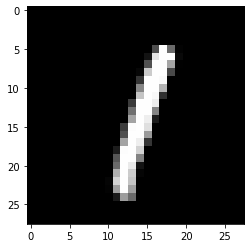

In [4]:
n = 5
# Достаем элемент n индекса для проверки обучающей выборки
""" 
На входе n элемент из массива
На выходе чб фото элемента
"""
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [5]:
# Нейронные сети (кроме сверточных) не работают с 2d картинками, поэтому 28*28 превращаем в 784
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [6]:
""" 
Векторизованные операции, создающие из чисел массив из 0 и 1
Применяются к каждому элементу массива отдельно (Для сети легче работать с данными 0->1)
"""
x_train = x_train.astype('float32')
x_train = x_train / 255 
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [7]:
print(y_test_org[n])

1


**Преобразуем метки в формат one hot encoding**

In [8]:
# превращение вектора из 0 и 1 в вектор с 10 классами 
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [9]:
print(y_test[n])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [10]:
# Модель прямого распространения
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [11]:
"""
Dence - вид связи нейронов между слоями
Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
relu - полулинейная функция = max(0, x) = ln(1+e^x)
На вход подается количество нейронов, входов, и функция активации
На выходе получается слой нейронов 
"""
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
# активационная функция softmax сделает так что на выходе сумма будет равна 1 
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [12]:
"""
На входе функция принимает вид подсчетов потерь, оптимизатор, и точность
На выходе она дает параметры нейронной сети(слои, кол-во нейронов)
"""
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# выводит информацию о модуле 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [16]:
"""
batch_size - объем данных, который будут обрабатывать нейроны за 1 эпоху.
epochs - количество повторов обучения
verbose=1 - выводит данные
fit - способ указать проверочную выборку
На вход функция принимает данные для выборки и параметры выше
На выходе получаем значения точности работы сети в разные эпохи
"""

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    verbose=1)


Epoch 1/10
300/300 [==============================] - 4s 11ms/step - loss: 1.7413 - accuracy: 0.7075
Epoch 2/10
300/300 [==============================] - 3s 11ms/step - loss: 0.8855 - accuracy: 0.7340
Epoch 3/10
300/300 [==============================] - 3s 11ms/step - loss: 0.9107 - accuracy: 0.7245
Epoch 4/10
300/300 [==============================] - 3s 11ms/step - loss: 0.9137 - accuracy: 0.7260
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.9684 - accuracy: 0.7044
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.9903 - accuracy: 0.6843
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 1.0590 - accuracy: 0.6625
Epoch 8/10
300/300 [==============================] - 3s 11ms/step - loss: 1.0861 - accuracy: 0.6559
Epoch 9/10
300/300 [==============================] - 3s 11ms/step - loss: 1.0555 - accuracy: 0.6604
Epoch 10/10
300/300 [==============================] - 3s 11ms/step - loss: 1.0463 - accura

## Проверяем качество обучения на тестовом наборе данных

In [17]:
""" 
функция evaluate проверяет точность распознования на проверочной выборке
На вход принимает значения выборки и их показывает
На выходе значение точности
"""
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.7117 - accuracy: 0.8252


In [18]:
scores

[0.7117328643798828, 0.8252000212669373]

In [19]:
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

Доля верных ответов на тестовых данных, в процентах: 82.52%


#Проверочная выборка

In [20]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(100, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
""" 
validation_split - берет процент данных из обучающей выборки и добавляет ее в проверочную
функция fit - способ указать проверучную выборку
"""
history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
240/240 [==============================] - 2s 7ms/step - loss: 0.5009 - accuracy: 0.8619 - val_loss: 0.2633 - val_accuracy: 0.9237
Epoch 2/10
240/240 [==============================] - 1s 5ms/step - loss: 0.2330 - accuracy: 0.9344 - val_loss: 0.1912 - val_accuracy: 0.9488
Epoch 3/10
240/240 [==============================] - 1s 6ms/step - loss: 0.1741 - accuracy: 0.9503 - val_loss: 0.1620 - val_accuracy: 0.9538
Epoch 4/10
240/240 [==============================] - 1s 6ms/step - loss: 0.1391 - accuracy: 0.9612 - val_loss: 0.1393 - val_accuracy: 0.9603
Epoch 5/10
240/240 [==============================] - 1s 5ms/step - loss: 0.1158 - accuracy: 0.9675 - val_loss: 0.1226 - val_accuracy: 0.9632
Epoch 6/10
240/240 [==============================] - 1s 6ms/step - loss: 0.0980 - accuracy: 0.9726 - val_loss: 0.1194 - val_accuracy: 0.9636
Epoch 7/10
240/240 [==============================] - 1s 6ms/step - loss: 0.0860 - accuracy: 0.9756 - val_loss: 0.1054 - val_accuracy: 0.9678
Epoch 

In [21]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 40000

# validation_data=(x_train[nVal:], y_train[nVal:]) - на данном x или y делаем validation
history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

Epoch 1/10
200/200 [==============================] - 5s 21ms/step - loss: 0.3314 - accuracy: 0.9067 - val_loss: 0.1803 - val_accuracy: 0.9483
Epoch 2/10
200/200 [==============================] - 4s 20ms/step - loss: 0.1375 - accuracy: 0.9599 - val_loss: 0.1323 - val_accuracy: 0.9622
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0901 - accuracy: 0.9740 - val_loss: 0.1100 - val_accuracy: 0.9671
Epoch 4/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0628 - accuracy: 0.9826 - val_loss: 0.0964 - val_accuracy: 0.9714
Epoch 5/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0450 - accuracy: 0.9880 - val_loss: 0.0905 - val_accuracy: 0.9743
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0330 - accuracy: 0.9914 - val_loss: 0.0874 - val_accuracy: 0.9729
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0238 - accuracy: 0.9948 - val_loss: 0.0858 - val_accuracy: 0.9750

## Визуализация качества обучения


Состав словаря History

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Печатаем значения ошибки на обучающем наборе данных

In [23]:
history.history['loss']

[0.33139508962631226,
 0.13752879202365875,
 0.09009759873151779,
 0.06280235946178436,
 0.045044008642435074,
 0.03300371393561363,
 0.023755894973874092,
 0.017874598503112793,
 0.01389645878225565,
 0.009647052735090256]

Печатаем долю неверных ответов на проверочном наборе данных

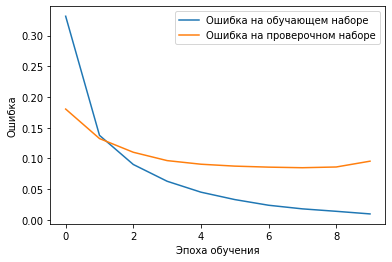

In [24]:
# График ошибок на обучающем наборе
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
# График ошибок на проверочном наборе
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
# Подписываем оси
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

#Переобучение
**Без Dropout**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 2.3341 - accuracy: 0.1400 - val_loss: 66.1546 - val_accuracy: 0.1951
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 45.7098 - accuracy: 0.3000 - val_loss: 57.6542 - val_accuracy: 0.2946
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 52.7191 - accuracy: 0.3900 - val_loss: 65.0325 - val_accuracy: 0.2398
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 65.1088 - accuracy: 0.3100 - val_loss: 36.8605 - val_accuracy: 0.2988
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 38.0984 - accuracy: 0.4200 - val_loss: 14.0649 - val_accuracy: 0.4214
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 10.6906 - accuracy: 0.6200 - val_loss: 8.8380 - val_accuracy: 0.4788
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 3.2706 - accuracy: 0.6500 - val_loss: 9.4531 - val_accuracy: 0.5273
Epoch 8/10
1/1 [===============

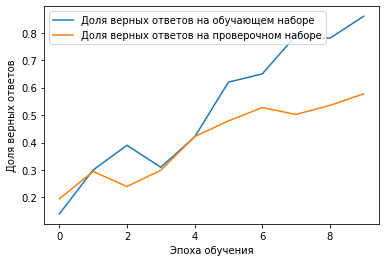

In [55]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100
"""
Функция, указывающая проверучную выборку для сети
На вход подается структура сети и данные для выборки
На выходе выдается показания точности на проверочной выборке
"""
def show_history(model, x_train, y_train):
  history = model.fit(x_train[:nVal], 
                      y_train[:nVal], 
                      batch_size=100, 
                      epochs=10,
                      validation_data=(x_train[nVal:], y_train[nVal:]),
                      verbose=1)
show_history(model, x_train, y_train)
"""
Функция визуализации точности и ошибок в сети 
На вход принимает значения точности на обучающей и проверочной выборках
Выдает график показаний точности на обучающей и проверочной выборках 
"""
def printing(history_accuracy, history_val_accuracy):
  plt.plot(history_accuracy, 
            label='Доля верных ответов на обучающем наборе')
  plt.plot(history_val_accuracy, 
              label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()
printing(history.history['accuracy'], history.history['val_accuracy'])


**Dropout 30%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
2/2 [==============================] - 6s 5s/step - loss: 35.5251 - accuracy: 0.0700 - val_loss: 56.4966 - val_accuracy: 0.1728
Epoch 2/10
2/2 [==============================] - 2s 2s/step - loss: 53.6656 - accuracy: 0.3350 - val_loss: 49.9983 - val_accuracy: 0.3514
Epoch 3/10
2/2 [==============================] - 2s 2s/step - loss: 38.5350 - accuracy: 0.4350 - val_loss: 14.9599 - val_accuracy: 0.3253
Epoch 4/10
2/2 [==============================] - 2s 2s/step - loss: 9.3012 - accuracy: 0.4700 - val_loss: 8.2703 - val_accuracy: 0.5654
Epoch 5/10
2/2 [==============================] - 3s 3s/step - loss: 3.8550 - accuracy: 0.7200 - val_loss: 6.6940 - val_accuracy: 0.5697
Epoch 6/10
2/2 [==============================] - 2s 2s/step - loss: 1.7734 - accuracy: 0.7800 - val_loss: 3.7938 - val_accuracy: 0.6274
Epoch 7/10
2/2 [==============================] - 3s 3s/step - loss: 0.9634 - accuracy: 0.8400 - val_loss: 2.8513 - val_accuracy: 0.6860
Epoch 8/10
2/2 [===================

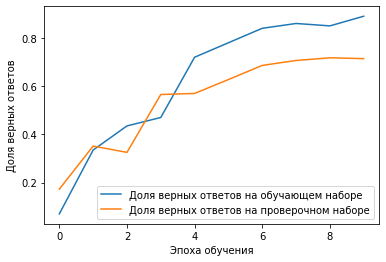

In [56]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.3))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 200

show_history(model, x_train[nVal:], y_train[nVal:])
printing(history.history['accuracy'], history.history['val_accuracy'])

**Dropout 80%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.6628 - accuracy: 0.0400 - val_loss: 43.7078 - val_accuracy: 0.0989
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 38.6348 - accuracy: 0.2200 - val_loss: 37.7966 - val_accuracy: 0.3603
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 44.6856 - accuracy: 0.3600 - val_loss: 22.5067 - val_accuracy: 0.4264
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 39.0478 - accuracy: 0.3400 - val_loss: 15.9574 - val_accuracy: 0.4314
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 23.1029 - accuracy: 0.3600 - val_loss: 8.2276 - val_accuracy: 0.5483
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 11.0239 - accuracy: 0.5500 - val_loss: 8.3342 - val_accuracy: 0.5877
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 8.0779 - accuracy: 0.6200 - val_loss: 8.3339 - val_accuracy: 0.5884
Epoch 8/10
1/1 [================

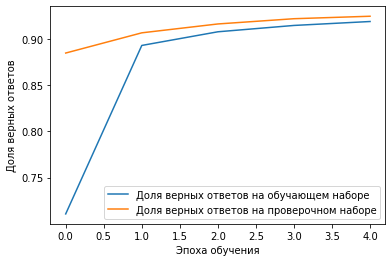

In [50]:
from tensorflow.python.keras.metrics import accuracy
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.8))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

show_history(model, x_train, y_train)
printing(history.history['accuracy'], history.history['val_accuracy'])

**Dropout 10%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.4215 - accuracy: 0.1200 - val_loss: 59.6888 - val_accuracy: 0.1534
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 45.5990 - accuracy: 0.2300 - val_loss: 53.5631 - val_accuracy: 0.3050
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 50.8394 - accuracy: 0.4000 - val_loss: 43.8224 - val_accuracy: 0.2541
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 46.7463 - accuracy: 0.3600 - val_loss: 29.0776 - val_accuracy: 0.3541
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 26.1520 - accuracy: 0.4400 - val_loss: 10.8481 - val_accuracy: 0.5324
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 6.1985 - accuracy: 0.6800 - val_loss: 13.1442 - val_accuracy: 0.4748
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 3.8428 - accuracy: 0.7100 - val_loss: 13.3913 - val_accuracy: 0.4630
Epoch 8/10
1/1 [==============

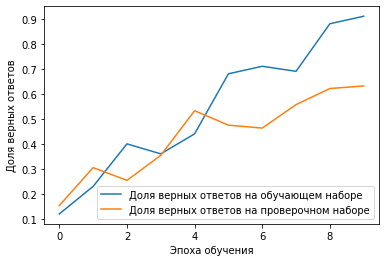

In [57]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.1))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

show_history(model, x_train, y_train)
printing(history.history['accuracy'], history.history['val_accuracy'])

#Активационные функции

Epoch 1/10
240/240 [==============================] - 2s 6ms/step - loss: 0.8360 - accuracy: 0.8182 - val_loss: 0.4034 - val_accuracy: 0.9000
Epoch 2/10
240/240 [==============================] - 1s 6ms/step - loss: 0.3599 - accuracy: 0.9051 - val_loss: 0.2954 - val_accuracy: 0.9203
Epoch 3/10
240/240 [==============================] - 1s 6ms/step - loss: 0.2856 - accuracy: 0.9204 - val_loss: 0.2508 - val_accuracy: 0.9315
Epoch 4/10
240/240 [==============================] - 1s 5ms/step - loss: 0.2462 - accuracy: 0.9308 - val_loss: 0.2239 - val_accuracy: 0.9377
Epoch 5/10
240/240 [==============================] - 1s 6ms/step - loss: 0.2174 - accuracy: 0.9388 - val_loss: 0.2031 - val_accuracy: 0.9438
Epoch 6/10
240/240 [==============================] - 1s 6ms/step - loss: 0.1960 - accuracy: 0.9445 - val_loss: 0.1873 - val_accuracy: 0.9459
Epoch 7/10
240/240 [==============================] - 1s 6ms/step - loss: 0.1774 - accuracy: 0.9495 - val_loss: 0.1732 - val_accuracy: 0.9516
Epoch 

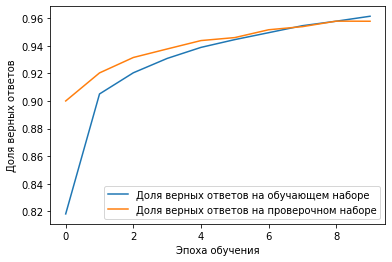

In [43]:
model = Sequential()

# Входной полносвязный слой, 100 нейронов, 784 входа в каждый нейрон
# Сигмоида позволяет усиливать слабые сигналы и уменьшает
model.add(Dense(100, input_dim=784, activation="sigmoid"))
#model.add(Dropout(0.2))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

printing(history.history['accuracy'], history.history['val_accuracy'])

# Материал изучения активационных функций
https://neurohive.io/ru/osnovy-data-science/activation-functions/
https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8

#Усреднение точности сети по нескольким итерациям

In [44]:
valAcc = []
iterations = 10

for i in range(1, iterations+1):
  model = Sequential()

  # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
  model.add(Dense(10, input_dim=784, activation="relu"))
  #model.add(Dropout(0.2))
  # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=200, 
                      epochs=5,
                      validation_split=0.2,
                      verbose=0)
  
  # Массив точности работы нейронных сетей
  currAcc = history.history['val_accuracy'][-1]
  valAcc.append(currAcc)
  print("Запуск", i, "точность", currAcc)
  

Запуск 1 точность 0.921750009059906
Запуск 2 точность 0.9236666560173035
Запуск 3 точность 0.925000011920929
Запуск 4 точность 0.921583354473114
Запуск 5 точность 0.9261666536331177
Запуск 6 точность 0.918833315372467
Запуск 7 точность 0.9237499833106995
Запуск 8 точность 0.9202499985694885
Запуск 9 точность 0.9231666922569275
Запуск 10 точность 0.9243333339691162


In [45]:
# Превращение из листа в numpy array для обработки данных
valAcc = np.array(valAcc)
# Среднее и амплитуда разброса точности
meanAcc = sum(valAcc) / valAcc.shape[0]
print(meanAcc)
print(max(valAcc) - min(valAcc))

0.9228500008583069
0.007333338260650635


#Запуск нескольких сетей

In [47]:
"""
Делаем функции с разным batch size-ом
На вход принимает структуру сети, размер обработки данных, кол-во эпох, и доля заимствования данных из проверочной выборки
"""
def evaluateModel(model, batchSize, epohs, valSplit):
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=batchSize, 
                      epochs=epohs,
                      validation_split=valSplit,
                      verbose=0)
  
  currAcc = history.history['val_accuracy'][-1]
  
  return currAcc, history

In [48]:
models = []

model = Sequential()
model.add(Dense(10, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(20, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(30, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

# Массив с объемом данных, который будут обрабатывать нейроны за 1 эпоху для разных нейронок
batchSisez = [100, 200, 300]

acc = []
hist = []
for i in range(len(models)):
  acc.append(evaluateModel(models[i], batchSisez[i], 5, 0.2))
    
print(acc)


[(0.9289166927337646, <keras.callbacks.History object at 0x7f3aea3aa790>), (0.9363333582878113, <keras.callbacks.History object at 0x7f3ae8b1ca50>), (0.9424166679382324, <keras.callbacks.History object at 0x7f3ae887bc50>)]
